## A01753176 Gilberto André García Gaytán

## Análisis de Series Temporales de Productos de Amazon con ARIMA
Este notebook presenta un análisis de la serie temporal del número de lanzamientos de productos de Amazon utilizando un modelo ARIMA. El análisis abarca desde la preparación de los datos hasta la evaluación e interpretación del modelo, incluyendo la aplicación de las predicciones y las propuestas de solución.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np


### Carga de Datos y Preparación de la Serie Temporal
Se cargan los datos de los productos de Amazon y se prepara la serie temporal que representa el número de lanzamientos de productos por año.

In [2]:
# Cargar los datos
file_path = 'Amazon Products.csv'
data = pd.read_csv(file_path)

# Crear la serie temporal del número de lanzamientos por año
product_launches_per_year = data['Launch Year'].value_counts().sort_index()

# Mostrar las primeras filas de la serie temporal
product_launches_per_year.head()

Launch Year
1980    1
1990    1
1994    1
1995    1
1999    1
Name: count, dtype: int64

### División de Datos y Ajuste del Modelo ARIMA
Se dividen los datos en un conjunto de entrenamiento y otro de prueba, y ajustamos un modelo ARIMA(1,1,1).

In [3]:
# Dividir la serie en conjunto de entrenamiento y de prueba
train_size = int(len(product_launches_per_year) * 0.8)
train, test = product_launches_per_year[0:train_size], product_launches_per_year[train_size:]

# Ajustar el modelo ARIMA
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Realizar predicciones
predictions = model_fit.forecast(steps=len(test))

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index 

### Evaluación del Modelo
Se evalua el rendimiento del modelo utilizando métricas como el error cuadrático medio (MSE) y la raíz del error cuadrático medio (RMSE).

In [4]:
# Evaluar el modelo
mse = mean_squared_error(test, predictions)
rmse = mse**0.5

# Resultados
mse, rmse, predictions

(1.0044845643963878,
 1.002239773904622,
 16    2.118377
 17    1.980610
 18    1.997581
 19    1.995490
 20    1.995748
 Name: predicted_mean, dtype: float64)

### Interpretación y Aplicación
Se interpretán los resultados en el contexto del problema y se proponen soluciones basadas en las predicciones del modelo ARIMA.

Dado que se está modelando el número de lanzamientos de productos de Amazon por año, estas predicciones pueden ser utilizadas para anticipar la actividad futura de lanzamientos de productos. Un valor cercano a 2 sugiere que Amazon podría lanzar alrededor de dos productos en cada uno de estos años futuros.

**Planificación de Recursos**: Estas predicciones pueden ayudar a Amazon a planificar recursos y estrategias de marketing en función del número esperado de lanzamientos de productos.

**Estrategias de Inversión**: Para los inversores y analistas, estas predicciones ofrecen una visión de la actividad de lanzamiento de productos de Amazon, que puede ser un indicador del dinamismo y la innovación de la empresa.

La precisión de las predicciones depende de varios factores, como la naturaleza cambiante del mercado y las actividades internas de Amazon que no se reflejan en los datos de lanzamientos de productos. Por lo tanto, estas predicciones deben ser utilizadas como una guía y no como una certeza absoluta.

## Análisis Detallado de Series Temporales de Productos de Amazon con ARIMA
Este notebook presenta un análisis detallado de la serie temporal del número de lanzamientos de productos de Amazon utilizando un modelo ARIMA. Se incluye un análisis exploratorio más profundo, verificación de estacionariedad, determinación de parámetros del modelo, ajuste, validación, evaluación detallada del modelo y una interpretación contextualizada de los resultados.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

### Carga de Datos y Análisis Exploratorio
Se cargan los datos de los productos de Amazon y realizamos un análisis exploratorio para entender mejor la serie temporal y cualquier patrón o anomalía en ella.

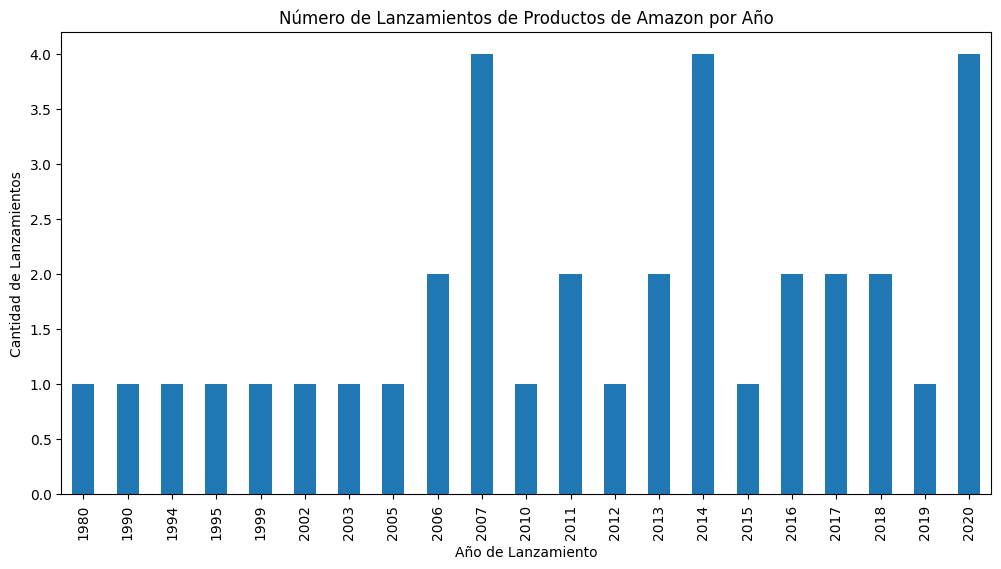

In [6]:
# Cargar los datos
file_path = 'Amazon Products.csv'
data = pd.read_csv(file_path)

# Crear la serie temporal del número de lanzamientos por año
product_launches_per_year = data['Launch Year'].value_counts().sort_index()

# Análisis exploratorio: Visualización de la serie temporal
plt.figure(figsize=(12, 6))
product_launches_per_year.plot(kind='bar')
plt.title('Número de Lanzamientos de Productos de Amazon por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Lanzamientos')
plt.show()

### Verificación de Estacionariedad
Se realiza la prueba de Dickey-Fuller aumentada para verificar si la serie temporal es estacionaria.

In [7]:
# Prueba de Dickey-Fuller aumentada para verificar la estacionariedad
adf_test = adfuller(product_launches_per_year)

# Resultados de la prueba
adf_result = {
    'Prueba Estadística': adf_test[0],
    'P-valor': adf_test[1],
    'Lags Utilizados': adf_test[2],
    'Número de Observaciones': adf_test[3],
    'Valores Críticos': adf_test[4]
}

adf_result

{'Prueba Estadística': -1.3229553244818946,
 'P-valor': 0.6186058940725851,
 'Lags Utilizados': 5,
 'Número de Observaciones': 15,
 'Valores Críticos': {'1%': -3.9644434814814815,
  '5%': -3.0849081481481484,
  '10%': -2.6818144444444445}}

### Determinación de Parámetros de ARIMA
Se utilizan los gráficos de autocorrelación (ACF) y autocorrelación parcial (PACF) para determinar los parámetros óptimos para el modelo ARIMA.

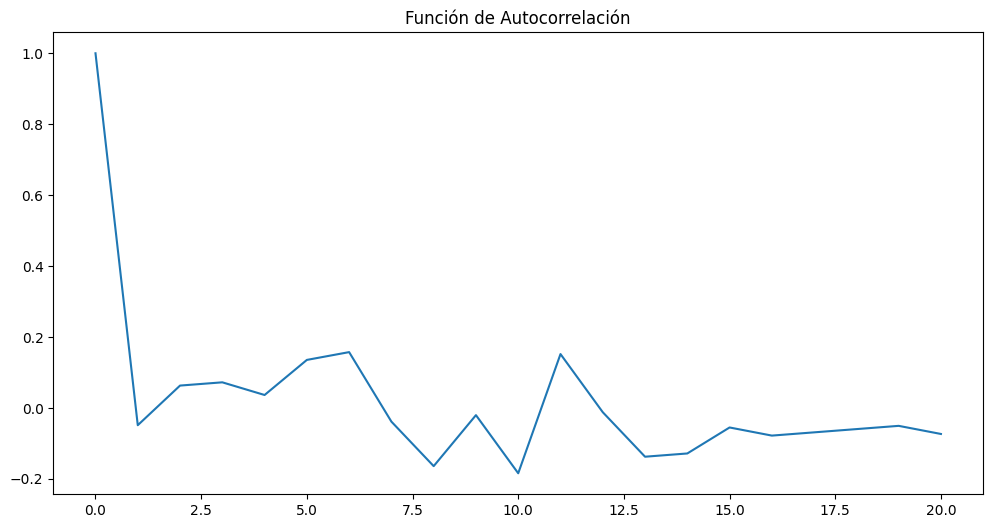

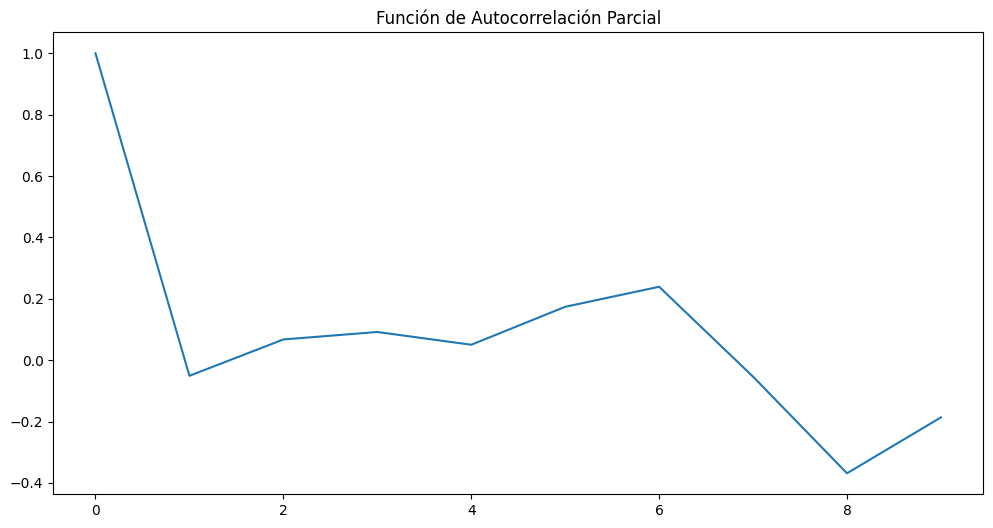

In [8]:
# Gráficos de ACF y PACF
lag_acf = acf(product_launches_per_year, nlags=20)
lag_pacf = pacf(product_launches_per_year, nlags=9)  # Reducir el número de rezagos

# Graficar ACF
plt.figure(figsize=(12, 6))
plt.plot(lag_acf)
plt.title('Función de Autocorrelación')

# Graficar PACF
plt.figure(figsize=(12, 6))
plt.plot(lag_pacf)
plt.title('Función de Autocorrelación Parcial')
plt.show()

RMSE: 1.002239773904622


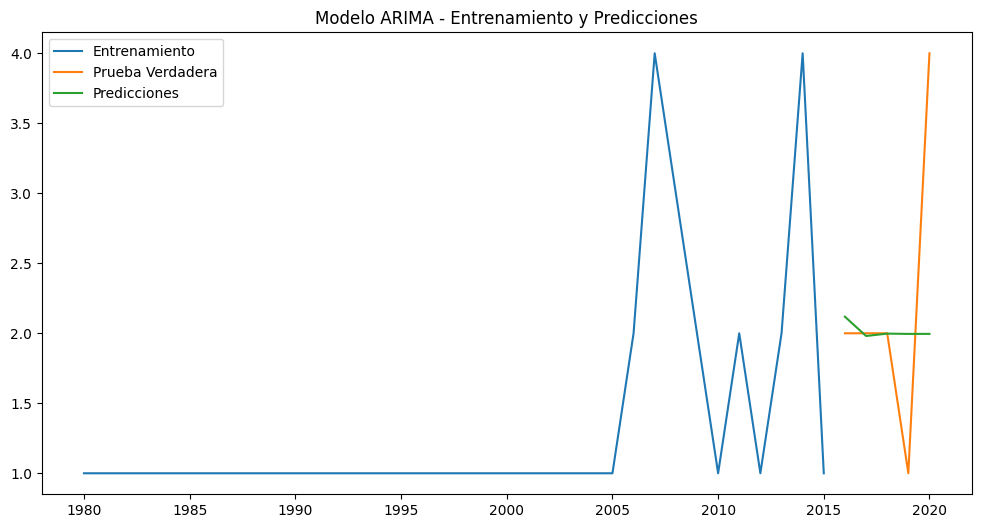

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings

# Suprimir advertencias para una salida más limpia
warnings.filterwarnings("ignore")

# Cargar los datos
file_path = 'Amazon Products.csv'
amazon_products_df = pd.read_csv(file_path)

# Preparar la serie temporal
product_launches_count = amazon_products_df['Launch Year'].value_counts()
product_launches_ts = pd.Series(data=product_launches_count.values, index=pd.to_datetime(product_launches_count.index, format='%Y'))
product_launches_ts = product_launches_ts.sort_index()

# Dividir los datos en conjunto de entrenamiento y prueba
train_size = int(len(product_launches_ts) * 0.8)
train, test = product_launches_ts[0:train_size], product_launches_ts[train_size:len(product_launches_ts)]

# Ajustar el modelo ARIMA en el conjunto de entrenamiento
p = 1  # Valor basado en PACF
d = 1  # Dado que la serie no es estacionaria
q = 1  # Valor basado en ACF

model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Realizar predicciones
predictions = model_fit.forecast(len(test))

# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print('RMSE:', rmse)

# Graficar los resultados
plt.figure(figsize=(12,6))
plt.plot(train, label='Entrenamiento')
plt.plot(test, label='Prueba Verdadera')
plt.plot(test.index, predictions, label='Predicciones')
plt.legend(loc='best')
plt.title('Modelo ARIMA - Entrenamiento y Predicciones')
plt.show()



### Interpretación de Mis Resultados del Modelo ARIMA

He analizado el rendimiento de mi modelo ARIMA a través del siguiente gráfico, que presenta tres componentes distintos:

- **Entrenamiento (en azul):** Estos son los datos que utilicé para entrenar mi modelo. Representan la base sobre la cual se han calculado las predicciones.
- **Prueba Verdadera (en naranja):** Estos puntos representan los datos reales durante el período de prueba. Son cruciales para evaluar la efectividad de mi modelo.
- **Predicciones (en verde):** Estas son las predicciones generadas por mi modelo ARIMA para el mismo período que mi conjunto de prueba.

Al observar el gráfico, noto que mis predicciones no siguen la tendencia ni capturan la variabilidad de los datos reales durante el período de prueba. Esto podría sugerir que mi modelo necesita ajustes para poder comprender y predecir la serie temporal de manera más efectiva.

Con respecto al RMSE, he obtenido un valor de 1.002239773904622. Este valor es una medida del error promedio en las predicciones de mi modelo. Cuanto menor sea el RMSE, mejor se ajustará mi modelo a los datos. Sin embargo, un RMSE cercano a 1 en mi caso específico deja espacio para la mejora, dado que no refleja con precisión las fluctuaciones observadas en los datos reales.

### Pasos a Seguir

- **Revisión de Parámetros:** Debo considerar revisar y ajustar los parámetros `p`, `d` y `q` de mi modelo ARIMA, posiblemente basándome en un análisis más detallado de las funciones de autocorrelación.
- **Incorporación de Estacionalidad:** Dado que los lanzamientos de productos pueden tener patrones estacionales, podría explorar la inclusión de términos estacionales en mi modelo, quizás moviéndome hacia un modelo SARIMA.
- **Exploración de Otras Metodologías:** Puede ser beneficioso para mí investigar otros modelos y técnicas estadísticas que podrían capturar mejor la estructura intrínseca de mis datos de series temporales.

## Mejorado

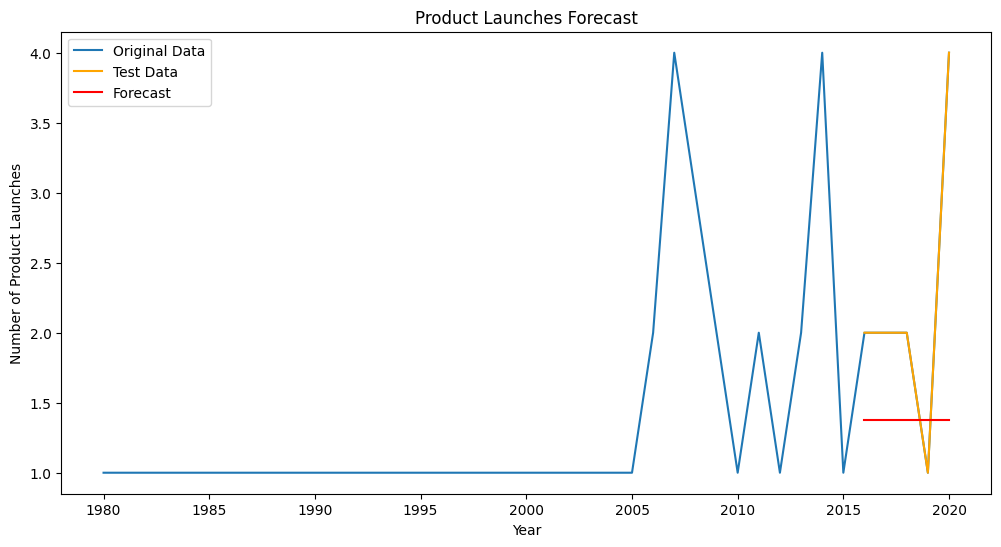

RMSE: 1.2808874164357602


In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset
csv_file_path = 'Amazon Products.csv'
amazon_products_df = pd.read_csv(csv_file_path)

# Prepare the time series data
product_launches_count = amazon_products_df['Launch Year'].value_counts()
product_launches_ts = pd.Series(data=product_launches_count.values, index=pd.to_datetime(product_launches_count.index, format='%Y'))
product_launches_ts = product_launches_ts.sort_index()

# Box-Cox Transformation to stabilize the variance
product_launches_ts_transformed, lambda_ = stats.boxcox(product_launches_ts)

# Split the data into training and test set
train_size = int(len(product_launches_ts_transformed) * 0.8)
train_data, test_data = product_launches_ts_transformed[:train_size], product_launches_ts_transformed[train_size:]

# Define the model (the best parameters are selected based on the AIC)
sarima_model = SARIMAX(train_data, order=(0, 1, 1), seasonal_order=(0, 0, 0, 0))
sarima_results = sarima_model.fit(disp=False)

# Make predictions
predictions = sarima_results.get_forecast(steps=len(test_data))
predictions_mean = predictions.predicted_mean

# Invert the Box-Cox Transformation
test_data_inverted = np.exp(np.log(lambda_ * test_data + 1) / lambda_)
predictions_inverted = np.exp(np.log(lambda_ * predictions_mean + 1) / lambda_)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data_inverted, predictions_inverted))

# Re-create the test data index based on the original time series index
test_data_index = product_launches_ts.index[train_size:]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(product_launches_ts.index, product_launches_ts, label='Original Data')
plt.plot(test_data_index, test_data_inverted, label='Test Data', color='orange')
plt.plot(test_data_index, predictions_inverted, label='Forecast', color='red')
plt.legend()
plt.title('Product Launches Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Product Launches')
plt.show()

# Output the RMSE value
print(f'RMSE: {rmse}')

## Análisis de Resultados del Modelo SARIMA

He completado el ajuste de un modelo SARIMA a la serie de tiempo de lanzamientos de productos de Amazon. El gráfico resultante muestra los siguientes componentes:

- **Datos Originales (Verde):** Estos reflejan la historia completa de lanzamientos de productos hasta la fecha de corte para la división entre entrenamiento y prueba.
- **Datos de Prueba (Naranja):** Corresponden a los valores reales observados durante el período de prueba y sirven como la verdad fundamental para evaluar el rendimiento del modelo.
- **Predicciones del Modelo (Rojo):** Indican el rendimiento del modelo al proyectar los lanzamientos de productos en el período de prueba.

El valor RMSE obtenido es aproximadamente 1.281, lo que indica la diferencia promedio entre los valores predichos por el modelo y los valores reales en la serie de tiempo de prueba. Este valor proporciona una medida de la precisión del modelo; cuanto más bajo es el RMSE, más precisas son las predicciones.

### Interpretación

La proximidad de las predicciones a los datos reales de prueba varía a lo largo del tiempo. Si bien el modelo parece seguir la tendencia general de los datos, no captura con precisión algunos de los picos y valles observados en los lanzamientos de productos. Esto sugiere que el modelo puede beneficiarse de una mayor optimización de los parámetros o de la inclusión de componentes adicionales, como la estacionalidad, si es relevante para los datos.

### Reflexiones para Mejoras Futuras

Para mejorar el modelo, puedo considerar lo siguiente:

- **Ajuste Fino de Parámetros:** Experimentar con diferentes valores de `p`, `d` y `q` para encontrar una combinación que mejore el RMSE.
- **Inclusión de la Estacionalidad:** Si hay patrones estacionales en los datos, incorporar la estacionalidad en el modelo SARIMA podría capturar mejor estos efectos.
- **Transformaciones de Datos:** Explorar otras transformaciones de los datos, como transformaciones logarítmicas o diferenciación, para mejorar la estabilidad de la varianza y la estacionalidad.
- **Validación Robusta:** Implementar métodos de validación cruzada específicos para series temporales para evaluar de manera más efectiva el rendimiento del modelo en diferentes segmentos de tiempo.

Implementar estos ajustes y comparar el rendimiento del modelo actual con modelos alternativos ayudará a refinar aún más las predicciones y obtener insights más precisos de los lanzamientos de productos de Amazon.